In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_folder = '/Users/luoshixin/Personal/hcdr/data'

In [3]:
application_file = os.path.join(data_folder, 'application_train.csv')

In [4]:
application_df = pd.read_csv(application_file, sep=',')

In [5]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
print(application_df.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

# Check the percentage of missing value

In [7]:
def compute_missing_percent(df, sort=False):
    not_null_count = df.notnull().sum()
    not_null_count.name = 'NonNullCount'
    temp_df = not_null_count.to_frame()
    total_count = df.shape[0]
    temp_df['NonNullPercent'] = temp_df['NonNullCount'] / total_count
    if sort:
        temp_df.sort_values(by='NonNullPercent', ascending=True, inplace=True)
    return temp_df

In [8]:
missing_result = compute_missing_percent(application_df)

In [9]:
missing_result.head()

,NonNullCount,NonNullPercent
SK_ID_CURR,307511,1.0
TARGET,307511,1.0
NAME_CONTRACT_TYPE,307511,1.0
CODE_GENDER,307511,1.0
FLAG_OWN_CAR,307511,1.0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


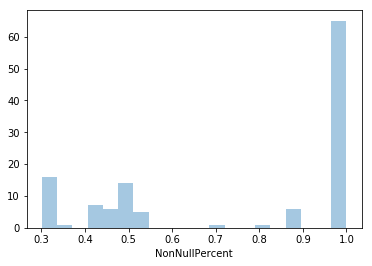

In [11]:
sns.distplot(missing_result['NonNullPercent'], bins=20, kde=False)

In [ ]:
# missing_result.to_csv('/Users/luoshixin/Downloads/null.csv', header=False, index=True)

# Distribution of numerical variables

In [30]:
def plot_distribution(df, column_name, accumulate=True, up_limit=None, bins=None):
    print('The feature name is: [{}]'.format(column_name))

    temp_df = df[df[column_name].notnull()]
    if accumulate:
        print(df[[column_name]].describe().T)
        sns.distplot(temp_df[column_name], bins=bins,
                     hist_kws=dict(cumulative=True),
                     kde_kws=dict(cumulative=True))
    elif up_limit is not None:   
        sns.distplot(temp_df[temp_df[column_name] <= up_limit][column_name], bins=bins)
    else:
        sns.distplot(temp_df[column_name], bins=bins)

### 1. CNT_CHILDREN
Observations:
1. The median CNT_CHILDREN is 0.0
2. There are some potential outliers 

The feature name is: [CNT_CHILDREN]
                 count      mean       std  min  25%  50%  75%   max
CNT_CHILDREN  307511.0  0.417052  0.722121  0.0  0.0  0.0  1.0  19.0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


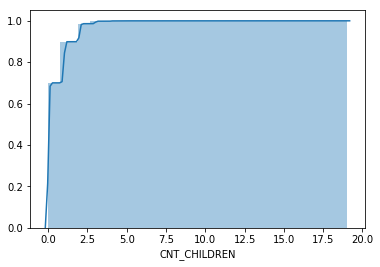

In [13]:
plot_distribution(application_df, 'CNT_CHILDREN')

The feature name is: [CNT_CHILDREN]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


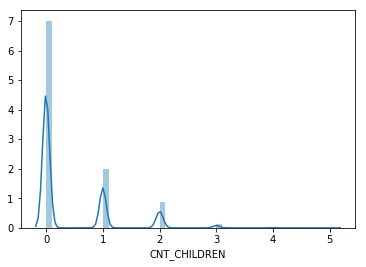

In [18]:
plot_distribution(application_df, 'CNT_CHILDREN', accumulate=False, up_limit=5)

### 2. AMT_INCOME_TOTAL
Observations:
1. The median AMT_INCOME_TOTAL is 147150.0
2. There are some potential outliers 

The feature name is: [AMT_INCOME_TOTAL]
                     count           mean            std      min       25%  \
AMT_INCOME_TOTAL  307511.0  168797.919297  237123.146279  25650.0  112500.0   

                       50%       75%          max  
AMT_INCOME_TOTAL  147150.0  202500.0  117000000.0  


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


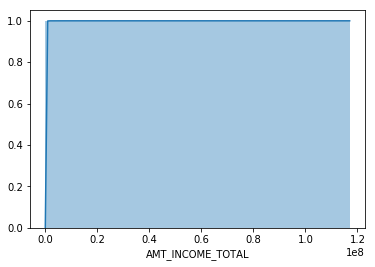

In [14]:
plot_distribution(application_df, 'AMT_INCOME_TOTAL')

The feature name is: [AMT_INCOME_TOTAL]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


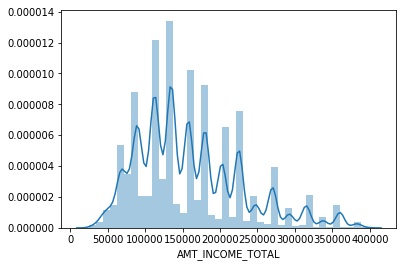

In [23]:
plot_distribution(application_df, 'AMT_INCOME_TOTAL', accumulate=False, up_limit=400000, bins=40)

### 3. AMT_CREDIT

The feature name is: [AMT_CREDIT]
               count           mean            std      min       25%  \
AMT_CREDIT  307511.0  599025.999706  402490.776996  45000.0  270000.0   

                 50%       75%        max  
AMT_CREDIT  513531.0  808650.0  4050000.0  


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


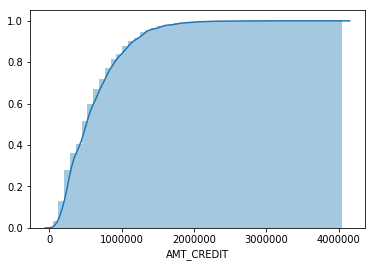

In [24]:
plot_distribution(application_df, 'AMT_CREDIT')

The feature name is: [AMT_CREDIT]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


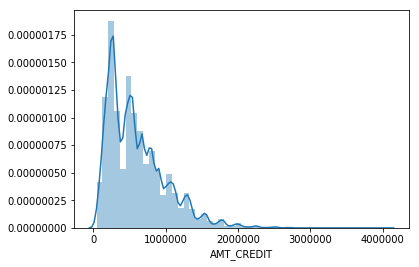

In [26]:
plot_distribution(application_df, 'AMT_CREDIT', accumulate=False)

### 4. AMT_ANNUITY

The feature name is: [AMT_ANNUITY]
                count          mean           std     min      25%      50%  \
AMT_ANNUITY  307499.0  27108.573909  14493.737315  1615.5  16524.0  24903.0   

                 75%       max  
AMT_ANNUITY  34596.0  258025.5  


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


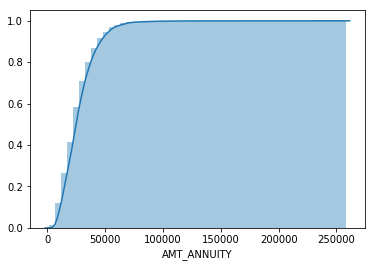

In [31]:
plot_distribution(application_df, 'AMT_ANNUITY')

The feature name is: [AMT_ANNUITY]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


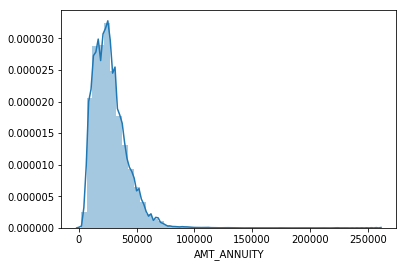

In [32]:
plot_distribution(application_df, 'AMT_ANNUITY', accumulate=False)

### 5. AMT_GOODS_PRICE

The feature name is: [AMT_GOODS_PRICE]
                    count           mean           std      min       25%  \
AMT_GOODS_PRICE  307233.0  538396.207429  369446.46054  40500.0  238500.0   

                      50%       75%        max  
AMT_GOODS_PRICE  450000.0  679500.0  4050000.0  


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


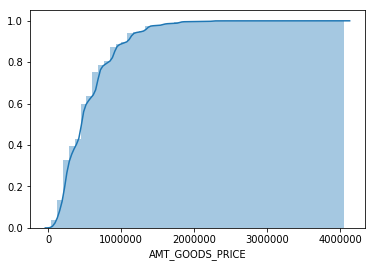

In [33]:
plot_distribution(application_df, 'AMT_GOODS_PRICE')

The feature name is: [AMT_GOODS_PRICE]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


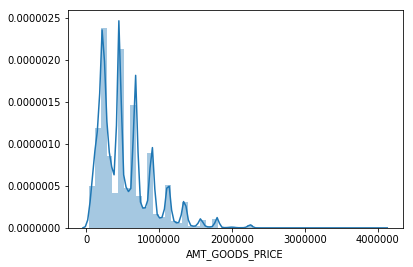

In [34]:
plot_distribution(application_df, 'AMT_GOODS_PRICE', accumulate=False)